# Assignment 2

In [144]:
import pandas as pd

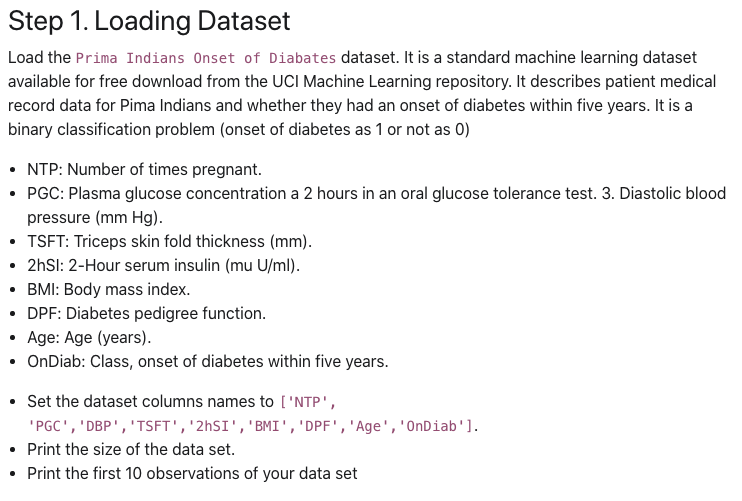

In [145]:
diabetes_df_1 = pd.read_csv('diabetes.csv')

old_and_new_names = {
    "Pregnancies":"NTP", "Glucose":"PGC", "BloodPressure":"DBP",
    "SkinThickness":"TSFT", "Insulin":"2hSI", "DiabetesPedigreeFunction":"DPF",
    "Outcome":"OnDiab"}
diabetes_df_1.rename(columns=old_and_new_names, inplace=True)
print("The size of dataset is ", diabetes_df_1.shape)
diabetes_df_1

The size of dataset is  (768, 9)


,NTP,PGC,DBP,TSFT,2hSI,BMI,DPF,Age,OnDiab
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


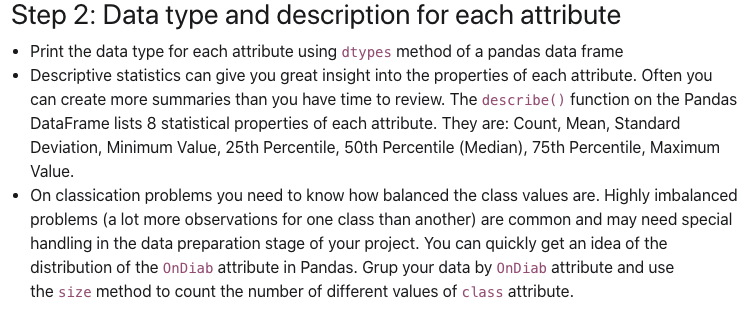

In [146]:
diabetes_df_1.dtypes

NTP         int64
PGC         int64
DBP         int64
TSFT        int64
2hSI        int64
BMI       float64
DPF       float64
Age         int64
OnDiab      int64
dtype: object

In [147]:
diabetes_df_1.describe()

,NTP,PGC,DBP,TSFT,2hSI,BMI,DPF,Age,OnDiab
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [148]:
diabetes_df_1.groupby("OnDiab")["OnDiab"].count()

OnDiab
0    500
1    268
Name: OnDiab, dtype: int64

<AxesSubplot:xlabel='OnDiab'>

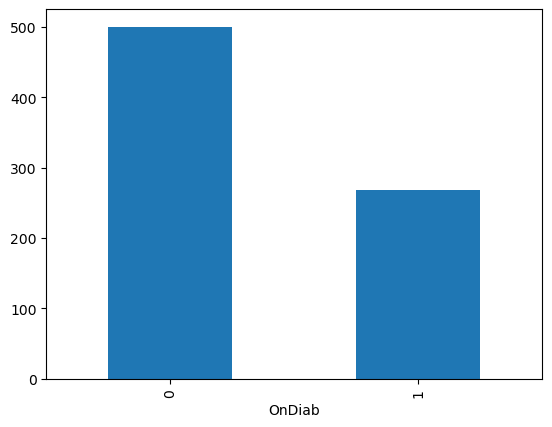

In [149]:
diabetes_df_1.groupby("OnDiab")["OnDiab"].count().plot(kind="bar")

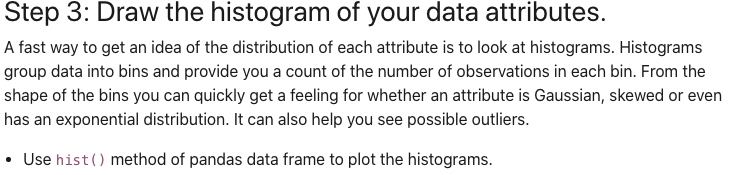

array([[<AxesSubplot:title={'center':'NTP'}>,
        <AxesSubplot:title={'center':'PGC'}>,
        <AxesSubplot:title={'center':'DBP'}>],
       [<AxesSubplot:title={'center':'TSFT'}>,
        <AxesSubplot:title={'center':'2hSI'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DPF'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'OnDiab'}>]], dtype=object)

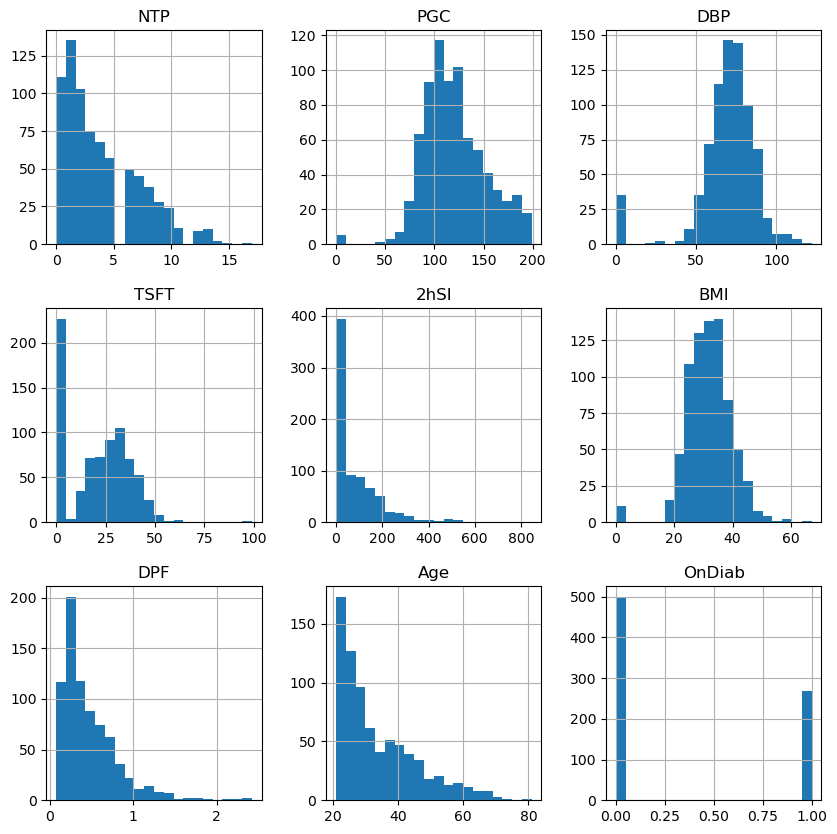

In [150]:
diabetes_df_1.hist(bins=20,figsize=(10,10))

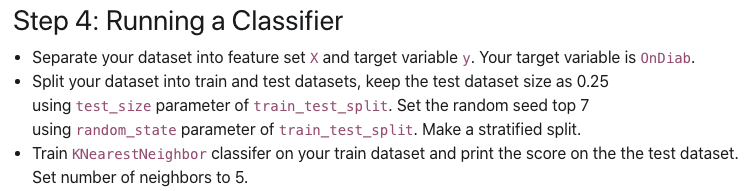

In [151]:
X = diabetes_df_1.drop("OnDiab",axis=1)
y = diabetes_df_1[["OnDiab"]]

from sklearn.model_selection import train_test_split
(X_train, y_train, X_test, y_test) = train_test_split(X,y,test_size=.25, random_state=7)
print("Shapes X_train/y_train/X_test/y_test", X_train.shape, y_train.shape, X_test.shape, \
    y_test.shape,sep=" ")

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

print("Shapes:",y.shape)
model = KNeighborsClassifier(n_neighbors=5)
y = np.ravel(y)
model.fit(X,y)
print("Score = ", model.score(X,y))
print("Shapes:",y.shape)

Shapes X_train/y_train/X_test/y_test (576, 8) (192, 8) (576, 1) (192, 1)
Shapes: (768, 1)
Score =  0.8033854166666666
Shapes: (768,)


In [152]:
# Question : Why is this happening
print("Type is ",type(y))


Type is  <class 'numpy.ndarray'>


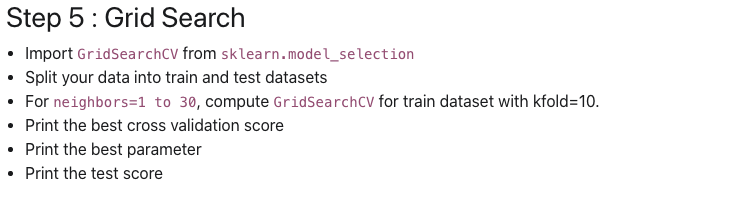

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test ) = train_test_split(X,y,test_size=.25,random_state=7)
print("Shapes:X_train,y_train,X_test,y_test:",X_train.shape, X_train.shape, y_train.shape, y_test.shape)
properties={"n_neighbors":np.arange(1,30,2)}
properties

Shapes:X_train,y_train,X_test,y_test: (576, 8) (576, 8) (576,) (192,)


{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])}

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cross_validation_genertor = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=properties, cv=cross_validation_genertor)
grid.fit(X_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])})

In [155]:
print("The best score is ", grid.best_score_)
print("The best parameter is ", grid.best_params_)
print("The test score is ", grid.score(X_test, y_test))

The best score is  0.7552026618269811
The best parameter is  {'n_neighbors': 11}
The test score is  0.7239583333333334
